In [1]:
# Tutorial 1: Single cell simulation with current injection (with BioNet)

In [2]:
from bmtk.builder.networks import NetworkBuilder

# 实例化网络，取名mcortex
net = NetworkBuilder('mcortex')

# 添加单个节点
net.add_nodes(
    cell_name='Scnn1a_473845048',  # 细胞名称
    potential='exc',  # 电位：兴奋性细胞
    model_type='biophysical',  # 模型类型：生物物理学模型
    model_template='ctdb:Biophys1.hoc',  # 模板文件
    model_processing='aibs_perisomatic',  # 加载模型
    dynamics_params='472363762_fit.json',  # 模型参数文件
    morphology='Scnn1a_473845048_m.swc'  # 模型结构文件
)

# 打印
print('Success!')

Success!


In [3]:
# 建立网络模型
net.build()

# 打印
print('Build success!')

# 保存网络模型的文件
net.save_nodes(output_dir='sim_ch01/network')

# 打印
print('Save success!')

Build success!
Save success!


In [4]:
# 利用.nodes()方法获取模型参数
for node in net.nodes():
    print(node)

# 打印
print('Finish!')

{'cell_name': 'Scnn1a_473845048', 'potential': 'exc', 'model_type': 'biophysical', 'model_template': 'ctdb:Biophys1.hoc', 'model_processing': 'aibs_perisomatic', 'dynamics_params': '472363762_fit.json', 'morphology': 'Scnn1a_473845048_m.swc', 'node_type_id': 100, 'node_id': 0}
Finish!


In [5]:
from bmtk.utils.sim_setup import build_env_bionet

# 设置模拟的环境
build_env_bionet(
    base_dir='sim_ch01',       # 脚本与配置文件夹
    config_file='config.json', # 配置文件
    network_dir='network',     # 存储网络文件的文件夹地址
    tstop=2000.0, dt=0.1,      # tstop是刺激的持续时间；dt的刺激间间隔（单位均为ms）
    report_vars=['v', 'cai'],  # 告诉模拟器，我们要记录膜电位（用'v'表示）和钙离子轨迹（用'cai'表示）
    current_clamp={            # 创建阶跃电流 
        'amp': 0.120,          # 电流大小
        'delay': 500.0,        # 从t0延迟500.0ms再开始
        'duration': 1000.0     # 持续时间1000.0ms
    },
    include_examples=True,    # 是否为教程示例复制组件文件，设为True
    compile_mechanisms=True   # 是否尝试编译神经元机制，设为True
)

# 打印
print('Set up success!')

/home/tianyan/sim_ch01/components/mechanisms
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special
Set up success!


/opt/conda/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


In [6]:
from bmtk.simulator import bionet

# 设置配置文件路径
conf = bionet.Config.from_json('sim_ch01/config.json')

# 打印
print('Success!')

# 建立环境
conf.build_env()

# 打印
print('Build success!')


Success!
2023-08-08 13:35:39,636 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


numprocs=1
Build success!


In [7]:
# 搭建网络
net = bionet.BioNetwork.from_config(conf)

# 打印
print('Net success!')

Net success!


In [8]:
# 创建刺激
sim = bionet.BioSimulator.from_config(conf, network=net)

# 打印
print('Srimulus success!')

2023-08-08 13:35:39,698 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2023-08-08 13:35:39,773 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


Srimulus success!


In [9]:
# 运行
sim.run()

2023-08-08 13:35:39,784 [INFO] Running simulation for 2000.000 ms with the time step 0.100 ms


INFO:NEURONIOUtils:Running simulation for 2000.000 ms with the time step 0.100 ms


2023-08-08 13:35:39,785 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2023-08-08 13:35:39,785 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2023-08-08 13:35:40,020 [INFO]     step:5000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:500.00 ms


2023-08-08 13:35:40,229 [INFO]     step:10000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:1000.00 ms


2023-08-08 13:35:40,437 [INFO]     step:15000 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:1500.00 ms


2023-08-08 13:35:40,645 [INFO]     step:20000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:2000.00 ms


2023-08-08 13:35:40,675 [INFO] Simulation completed in 0.8914 seconds 


INFO:NEURONIOUtils:Simulation completed in 0.8914 seconds 


In [10]:
from bmtk.analyzer.spike_trains import to_dataframe

# 显示数据
to_dataframe(config_file='sim_ch01/config.json')

,timestamps,node_ids,population
0,554.8,0,mcortex
1,1379.5,0,mcortex
2,1319.5,0,mcortex
3,1259.5,0,mcortex
4,1199.5,0,mcortex
5,1139.7,0,mcortex
6,1079.9,0,mcortex
7,1020.4,0,mcortex
8,961.2,0,mcortex
9,902.6,0,mcortex


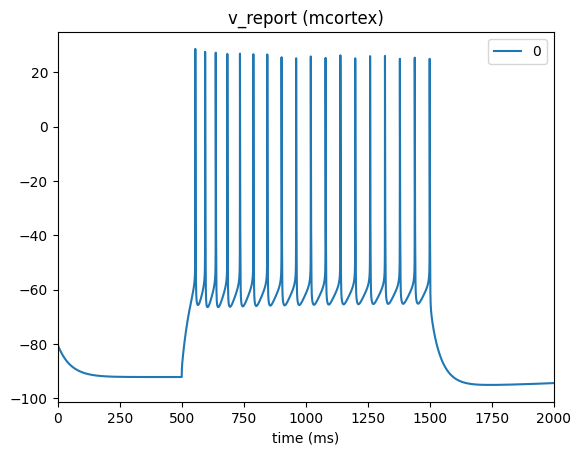

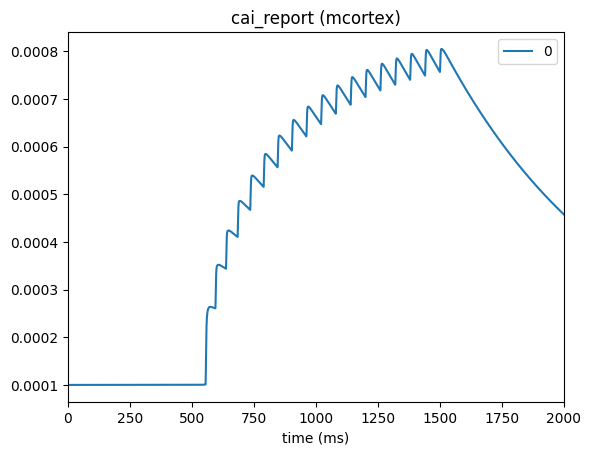

In [11]:
from bmtk.analyzer.compartment import plot_traces

# 分析数据
_ = plot_traces(config_file='sim_ch01/config.json', node_ids=[0], report_name='v_report')
_ = plot_traces(config_file='sim_ch01/config.json', node_ids=[0], report_name='cai_report')